In [38]:
import pandas as pd

column_names = ["text", "is_hate"]

df = pd.read_csv("0.FinalDataset.csv", on_bad_lines='skip', sep=",", encoding='iso-8859-1', header=None, names=column_names)

In [39]:
print(df)

                                                   text  is_hate
0     Ponnayo danne kellek aduwa gaman laga inna kol...        1
1                  Ape harak samjeta eka honda adrshyak        0
2          Tpita pisuda yako man htuwe atta kiyala aiyo        0
3     Kimbak eduwoth ape untath amma thaththawath pe...        1
4     Lisan nathawa yanna puluwan yako ...api dannaw...        0
...                                                 ...      ...
2200                                      sajith nariya        1
2201  mechchra deyak wela goiyoi bayyoi thama innwan...        1
2202  Rajapassa Kalakannie reala chandayak pavathval...        1
2203  KAPUTA HITIYATAH WADA HODATA WAJABANAWA.AHINSA...        1
2204                  Rata kapu kaputo un thama palanye        1

[2205 rows x 2 columns]


In [40]:
df['is_hate'] = df['is_hate'].astype(bool)
df.head()

,text,is_hate
0,Ponnayo danne kellek aduwa gaman laga inna kol...,True
1,Ape harak samjeta eka honda adrshyak,False
2,Tpita pisuda yako man htuwe atta kiyala aiyo,False
3,Kimbak eduwoth ape untath amma thaththawath pe...,True
4,Lisan nathawa yanna puluwan yako ...api dannaw...,False


In [41]:
# Count the occurrences of each value in the 'is_hate' column
value_counts = df['is_hate'].value_counts()
print(value_counts)

is_hate
False    1303
True      902
Name: count, dtype: int64


/var/folders/8l/0dr6g72x2rq8wcm2j5c630j00000gn/T/ipykernel_2707/3426880195.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  # Format y-axis ticks as percentages


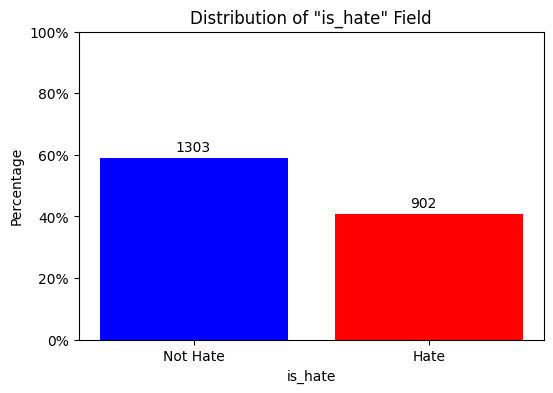

In [5]:
import matplotlib.pyplot as plt

# Calculate the percentages
total_count = len(df)
percentages = (value_counts / total_count) * 100

# Create a bar chart to visualize the distribution with percentages on the y-axis
plt.figure(figsize=(6, 4))
bars = plt.bar(percentages.index, percentages.values, color=['blue', 'red'])
plt.xticks(percentages.index, ['Not Hate', 'Hate'])
plt.xlabel('is_hate')
plt.ylabel('Percentage')
plt.title('Distribution of "is_hate" Field')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  # Format y-axis ticks as percentages

# Add counts as text labels on top of the bars
for bar, count in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.08, bar.get_height() + 2, str(count), fontsize=10, color='black')

plt.show()

In [58]:
len("hello      ")

11

/var/folders/8l/0dr6g72x2rq8wcm2j5c630j00000gn/T/ipykernel_2707/1138552270.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])


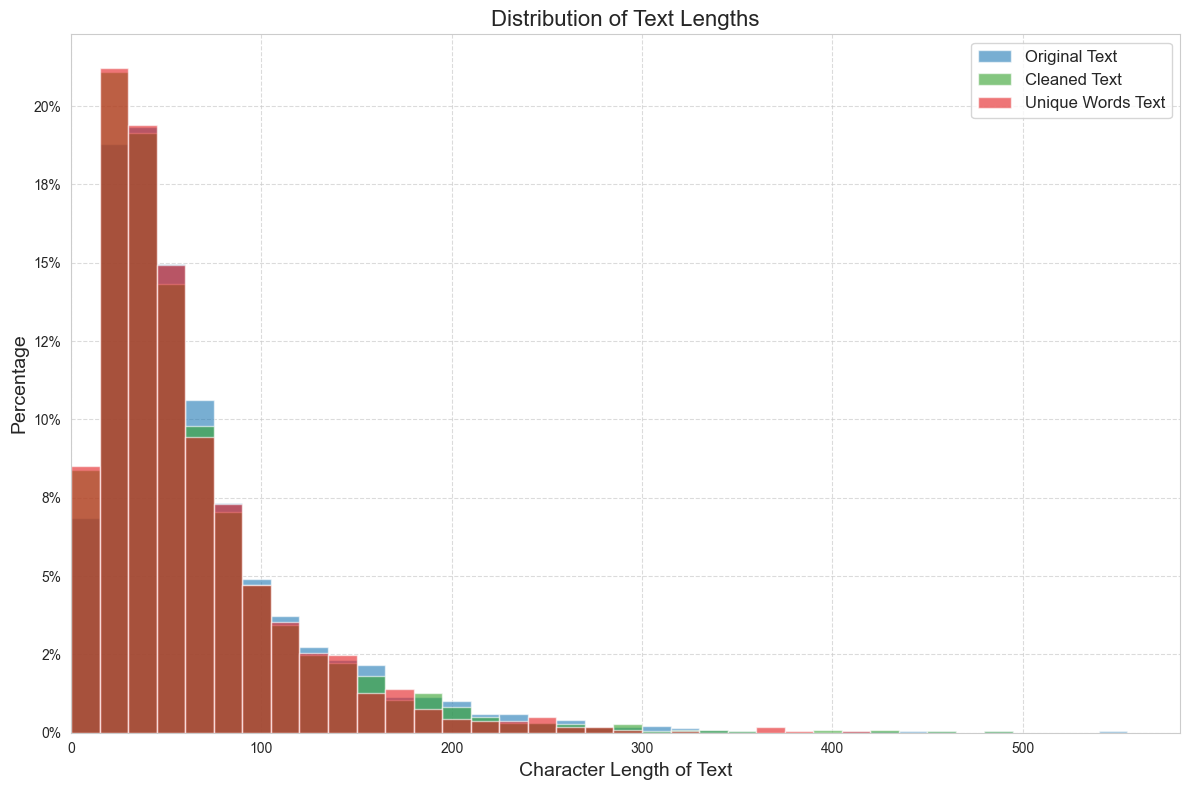

In [68]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean special characters
def clean_text(text):
    # Replace non-alphabetic characters with spaces
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Replace multiple spaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    
    return cleaned_text.strip().lower()
    

# Remove duplicate words
def remove_duplicates(text):
    words = text.split()
    return ' '.join(sorted(set(words), key=words.index))


# Calculate text lengths for each scenario
df['original_length'] = df['text'].apply(len)
df['clean_text'] = df['text'].apply(clean_text)
df['clean_length'] = df['clean_text'].apply(len)
df['unique_words_text'] = df['clean_text'].apply(remove_duplicates)
df['unique_words_length'] = df['unique_words_text'].apply(len)


# Plot histograms
plt.figure(figsize=(12, 8))

# Use a clean and coherent color palette
# colors = ['steelblue', 'seagreen', 'purple']
colors = ['#1f78b4', '#33a02c', '#e31a1c']

# Define the same bins for all histograms
bins = range(0, max(df['original_length']) + 10, 15)

# Calculate the percentages for each bin
weights_original = np.ones_like(df['original_length']) / len(df['original_length'])
weights_clean = np.ones_like(df['clean_length']) / len(df['clean_length'])
weights_unique = np.ones_like(df['unique_words_length']) / len(df['unique_words_length'])

# Plot original text lengths
plt.hist(df['original_length'], bins=bins, alpha=0.6, label='Original Text', weights=weights_original, color=colors[0])

# Plot cleaned text lengths
plt.hist(df['clean_length'], bins=bins, alpha=0.6, label='Cleaned Text', weights=weights_clean, color=colors[1])

# Plot unique words text lengths
plt.hist(df['unique_words_length'], bins=bins, alpha=0.6, label='Unique Words Text', weights=weights_unique, color=colors[2])

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Enhance font sizes for better clarity
plt.xlabel('Character Length of Text', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Distribution of Text Lengths', fontsize=16)
plt.legend(loc='upper right', fontsize=12)

# Ensure x-axis starts at 0
plt.xlim(0, )

# Show percentages on the y-axis
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])

# Tidy layout
plt.tight_layout()
plt.show()


In [69]:
# Calculate the total character lengths for each scenario
total_original_length = df['original_length'].sum()
total_clean_length = df['clean_length'].sum()
total_unique_words_length = df['unique_words_length'].sum()

# Calculate the overall percentage reduction due to cleaning of texts
percentage_reduction_clean = ((total_original_length - total_clean_length) / total_original_length) * 100

# Calculate the overall percentage reduction due to duplicate word removal
percentage_reduction_unique = ((total_clean_length - total_unique_words_length) / total_clean_length) * 100

print(f'Overall percentage reduction due to cleaning of texts: {percentage_reduction_clean:.2f}%')
print(f'Overall percentage reduction due to duplicate word removal: {percentage_reduction_unique:.2f}%')


Overall percentage reduction due to cleaning of texts: 6.05%
Overall percentage reduction due to duplicate word removal: 3.92%


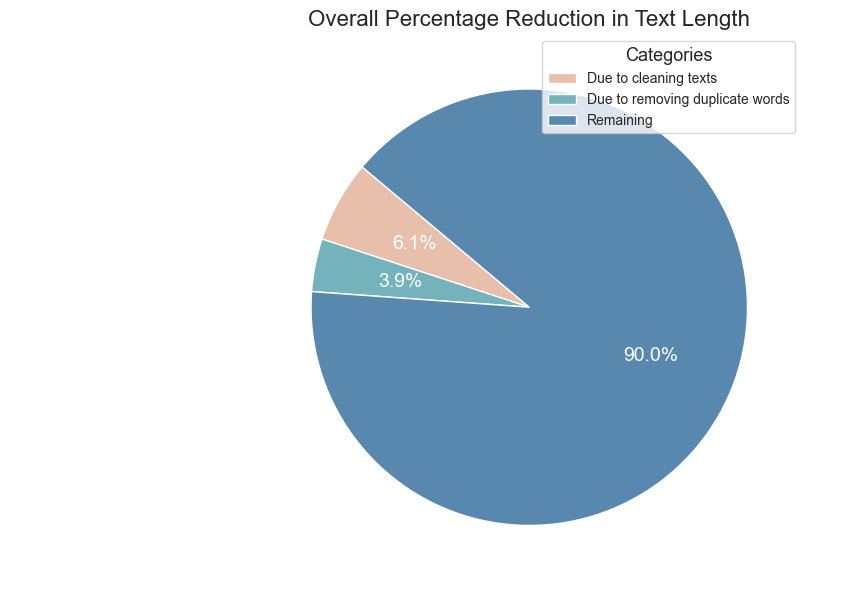

In [106]:
colors = ['#E7BFAB', '#74B2BC', '#5988AF']

# Categories
categories = ['Due to cleaning texts', 'Due to removing duplicate words', 'Remaining']

remaining = 100 - percentage_reduction_clean - percentage_reduction_unique

# Percentages
percentages = [percentage_reduction_clean, percentage_reduction_unique, remaining]

# Create pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(percentages, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140,
                                   textprops={'fontsize': 14, 'color': 'white'})

# Enhance font sizes for better clarity
plt.title('Overall Percentage Reduction in Text Length', fontsize=16)
# Adding a legend in the upper right corner
plt.legend(wedges, categories, title="Categories", loc="upper right", title_fontsize='13', fontsize='10')

# Improve display of labels and percentages
for text, autotext in zip(texts, autotexts):
    if autotext.get_text() == '0.0%':
        text.set_visible(False)
        autotext.set_visible(False)

# Tidy layout
plt.tight_layout()
plt.show()

In [6]:
import re
  
def clean_text(text):
    # Replace non-alphabetic characters with spaces
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Replace multiple spaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    
    return cleaned_text.strip().lower()
    
df['text'] = df['text'].apply(clean_text)
print(df)

                                                   text  is_hate
0     ponnayo danne kellek aduwa gaman laga inna kol...     True
1                  ape harak samjeta eka honda adrshyak    False
2          tpita pisuda yako man htuwe atta kiyala aiyo    False
3     kimbak eduwoth ape untath amma thaththawath pe...     True
4     lisan nathawa yanna puluwan yako api dannawa o...    False
...                                                 ...      ...
2200                                      sajith nariya     True
2201   mechchra deyak wela goiyoi bayyoi thama innwaneh     True
2202  rajapassa kalakannie reala chandayak pavathval...     True
2203  kaputa hitiyatah wada hodata wajabanawa ahinsa...     True
2204                  rata kapu kaputo un thama palanye     True

[2205 rows x 2 columns]


In [7]:
# Specify the path to save the modified content
df.to_csv('1.preprocessed_data.csv', index=False)